# Frequency of words in the Alien franchise

## Project Description

This is a basic Natural Language Processing project using Python &amp; Nltk.

The goal is to plot frequency distributions of words in the *Alien* franchise using the movies subtitles from [Springfield! Springfield!](https://www.springfieldspringfield.co.uk/).

For that, we will dive in to analyzing the movies subtitles using the Natural Language ToolKit (`nltk`).
In the process we will learn about important aspects of Natural Language Processing (NLP) such as tokenization and stopwords.
We will come out being able to visualize word frequency distributions of any subtitles that we can find on [Springfield! Springfield!](https://www.springfieldspringfield.co.uk/).

## Alien Movies

### Original Series

- Alien (1979)
- Aliens (1986)
- Alien 3 (1992)
- Alien Resurrection (1997)

### Prequel Series

- Prometheus (2012)
- Alien: Covenant (2017)

### Spin-off Series

- Alien vs. Predator (2004)
- Aliens vs. Predator: Requiem (2007)

### 1. Import Modules

In [1]:
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

### 2. Getting the text from the text file

In [2]:
# Get movie subtitles
with open('./movies_subtitles/Alien.txt') as f:
    text = f.read()
# Check object type: 'str'
type(text)

str

### 3. Extract words from our text using NLP

You'll now use `nltk`, the Natural Language Toolkit, to

1. Tokenize the text (fancy term for splitting into tokens, such as words)
2. Remove stopwords (words such as 'a' and 'the')

#### Step 1: Tokenize

We want to tokenize the text, that is, split it into a list of words.

To do this, we are going to use a powerful tool called *regular expressions*, or *regex*.

The regular expression we are going to use is *\w+*:

- the '\w' is a special character that will match any alphanumeric along with underscores
- the '+' tells that the previous character in the regex can appear as many times as we want in strings we are trying to match. 

In [3]:
# Create tokenizer
tokenizer = RegexpTokenizer('\w+')
# Create tokens
tokens = tokenizer.tokenize(text)
# Print some tokens as sanity check
tokens[:5]

['Have', 'you', 'got', 'any', 'biscuits']

In [4]:
# Initialize new list
words = []
# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())
# Print some words as sanity check
words[:5]

['have', 'you', 'got', 'any', 'biscuits']

#### Step 2: Remove stopwords

Is is common practice to remove words that appear a lot in the English language such as 'the', 'of', 'a' (known as stopwords) because they are not so interesting.

The package `nltk` has a list of stopwords in English which we will now store as `sw` and the print the first several elements of.

In [5]:
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

We want the list of all words in `words` that are *not* in `sw`. One way to get this list is to loop over all elements of `words` and add them to a new list if they are *not* in `sw`. We will also add stopwords from `scikit-learn`.

In [6]:
# Add sklearn stopwords to words_sw
sw = set(list(sw) + list(ENGLISH_STOP_WORDS))
# Initialize new list
words_ns = []
# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)
# Print some words as sanity check
words_ns[:5]

['got', 'biscuits', 'cornbread', 'cold', 'brett']

### 4. Plot the frequency distribution

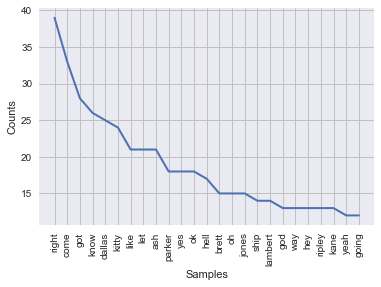

In [7]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create frequency distribution and plot
freqdist = nltk.FreqDist(words_ns)
freqdist.plot(25)

### 5. Create a generic function

There are many subtitles inside the `movies_subtitles` folder so it makes sense to write a generic function that does all of what we have done so far.

In [8]:
def plot_word_freq(filename):
    """
    Takes a subtitle text file and plots a word frequency distribution
    """
    # Get movie subtitles
    with open(filename) as f:
        text = f.read()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Add sklearn stopwords to words_sw
    sw = set(list(sw) + list(ENGLISH_STOP_WORDS))
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create frequency distribution and plot
    freqdist = nltk.FreqDist(words_ns)
    freqdist.plot(25)

Now we the function to plot word frequency for the other movies:

- Aliens

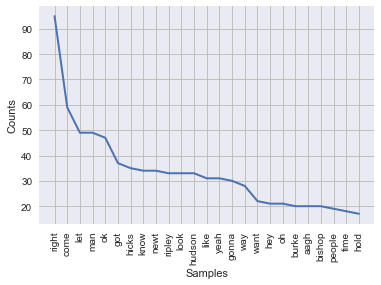

In [9]:
plot_word_freq('./movies_subtitles/Aliens.txt')

- Alien 3

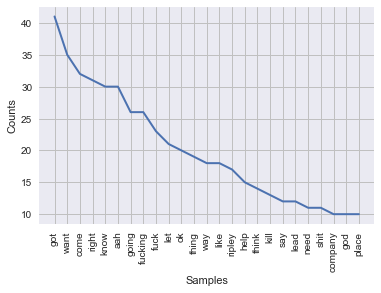

In [10]:
plot_word_freq('./movies_subtitles/Alien3.txt')

- Alien Resurrection

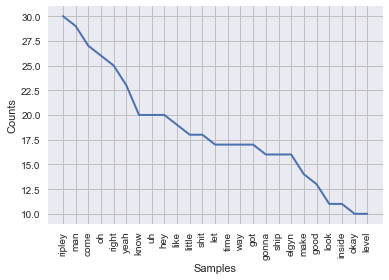

In [11]:
plot_word_freq('./movies_subtitles/Alien_Resurrection.txt')

- Alien vs. Predator

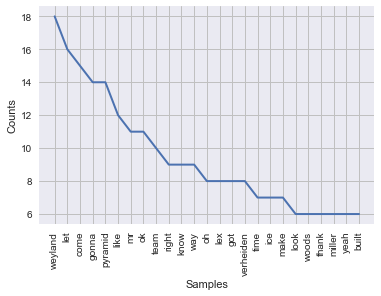

In [12]:
plot_word_freq('./movies_subtitles/AlienvsPredator.txt')

- Aliens vs. Predator: Requiem

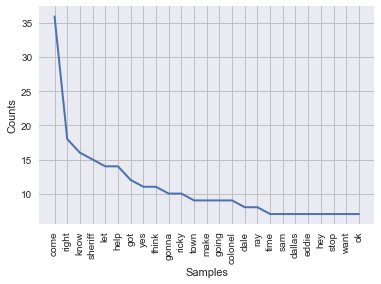

In [13]:
plot_word_freq('./movies_subtitles/AliensvsPredator_Requiem.txt')

- Prometheus

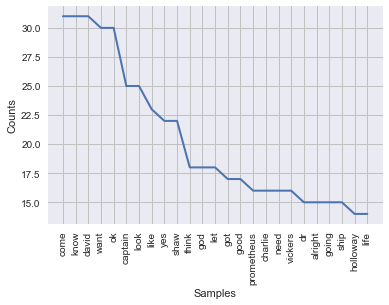

In [14]:
plot_word_freq('./movies_subtitles/Prometheus.txt')

- Alien: Covenant

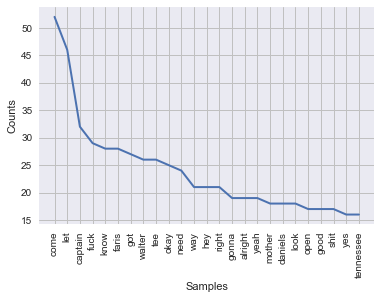

In [15]:
plot_word_freq('./movies_subtitles/Alien_Covenant.txt')